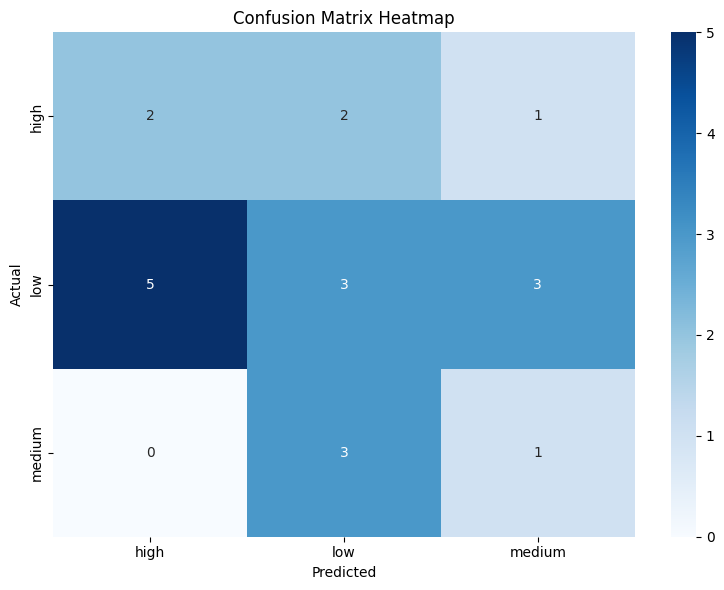

Accuracy: 0.30
Precision (macro): 0.29
Recall (macro): 0.31

Classification Report:
               precision    recall  f1-score   support

        high       0.29      0.40      0.33         5
         low       0.38      0.27      0.32        11
      medium       0.20      0.25      0.22         4

    accuracy                           0.30        20
   macro avg       0.29      0.31      0.29        20
weighted avg       0.32      0.30      0.30        20



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/content/plants.csv'
plants_df = pd.read_csv(file_path)


le_soil = LabelEncoder()
le_water_need = LabelEncoder()
plants_df['soil_type_encoded'] = le_soil.fit_transform(plants_df['soil_type'])
plants_df['water_need_encoded'] = le_water_need.fit_transform(plants_df['water_need'])


X = plants_df[['sunlight_hours', 'watering_freq_per_week', 'soil_type_encoded']]
y = plants_df['water_need_encoded']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_water_need.classes_,
            yticklabels=le_water_need.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names=le_water_need.classes_)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (macro): {precision:.2f}")
print(f"Recall (macro): {recall:.2f}")
print("\nClassification Report:\n", classification_rep)
